In [2]:
%matplotlib inline

import numpy as np
import pandas as pd 
import pandas_profiling 
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\farewell\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\farewell\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\farewell\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\farewell\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\farewell\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\farewell\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance(

## 資料確認

想要知道的問題：

1. 各資料欄位定義與屬性
2. 各資料欄位的筆數
3. 各欄位缺失值狀況
4. 各資料欄位的分布
5. 沿海拔各型值的變化 (總體、物種)
6. 三型值的相關性


In [118]:
df  = pd.read_csv('E:/2015TT&RS_SW_final20180517.csv', encoding='big5')
df.columns

Index(['Specimen No.', 'Family', 'Code', 'Species', 'Altitude', 'W_length',
       'B_length', 'Weight', 'Weight_with_pin', 'Weight_pin', 'No.',
       'Coll_data', 'Coll_date', 'Sex', 'dissected', 'Note', 'Non-sampled',
       '補籤', '跳籤', 'Photo', 'ASIZHX_code', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Species.1'],
      dtype='object')

In [119]:
df_Note = pd.read_csv('E:/origin_data/species_data/moth/moth_ecological_data_from_googlesheet.csv', encoding='big5')
df_Note.columns

Index(['Specimen No.', 'Wing length (mm)', 'Body length (mm)', 'Weight',
       'Weight(ori)', '針重', '針序號', 'Pin_type', 'Note', '建檔者（ C/W/H ）',
       '形質測量建檔日期', 'Sex', 'Coll_data', 'Coll_date', 'Note2', 'Family',
       'Accepted_code', 'Photo', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Species'],
      dtype='object')

In [120]:
df.shape

(12539, 28)

1. 各欄位名稱 ( 'Specimen No.', 'Family', 'Code', 'Species', 'Altitude', 'W_length',
                          'B_length', 'Weight', 'Weight_with_pin', 'Weight_pin', 'No.',
                         'Coll_data', 'Coll_date', 'Sex', 'dissected', 'Note', 'Non-sampled',
                         '補籤', '跳籤', 'Photo', 'ASIZHX_code')
                  
2. 總共幾欄 ( total : 28, selected to analysis : 21)


In [121]:
df_selected = df.loc[ : , ['Specimen No.', 'Family', 'Species', 'Altitude', 'W_length','B_length', 'Weight', 'Weight_with_pin', 'Weight_pin','Coll_data', 'Coll_date', 'Note']]

df_selected.head(5)

,Specimen No.,Family,Species,Altitude,W_length,B_length,Weight,Weight_with_pin,Weight_pin,Coll_data,Coll_date,Note
0,ASIZHX121668,Crambidae,Agrotera sp.,343,0.00,0.00,0.0000,0.0000,0.000,MCE0250,20180721,Micro
1,ASIZHX121669,Crambidae,Agrotera sp.,343,0.00,0.00,0.0000,0.0000,0.000,MCE0250,20180721,Micro
2,ASIZHX121516,Geometridae,Amblychia angeronaria,343,42.05,24.45,0.0000,0.0000,0.000,MCE0250,20180720,NaN
3,ASIZHX121593,Sphingidae,Ambulyx kuangtungensis,343,33.40,29.02,0.1226,0.1686,0.046,MCE0250,20180721,NaN
4,ASIZHX121756,Noctuidae,Apsarasa radians,343,22.17,19.45,0.0000,0.0000,0.000,MCE0250,20180722,NaN


In [122]:
df_Note_selected = df_Note.loc[:, ['Specimen No.', 'Note']]
# df_Note_selected[df_Note_selected['Specimen No.'] == 'ASIZHX113862' ]

In [123]:
# print( df_selected.shape, df_Note_selected.shape, df_merge.shape)

In [123]:
# df_selected.to_csv('E:/df_select.csv')
# df_Note_selected.to_csv('E:/df_Note_selected.csv')
# df_merge.to_csv('E:/df_merge.csv')

In [124]:
df_merge = pd.merge(df_selected, df_Note_selected, how='left', left_on= 'Specimen No.', right_on='Specimen No.')
df_merge.head(5)

,Specimen No.,Family,Species,Altitude,W_length,B_length,Weight,Weight_with_pin,Weight_pin,Coll_data,Coll_date,Note_x,Note_y
0,ASIZHX121668,Crambidae,Agrotera sp.,343,0.00,0.00,0.0000,0.0000,0.000,MCE0250,20180721,Micro,僅做紀錄未測量。
1,ASIZHX121669,Crambidae,Agrotera sp.,343,0.00,0.00,0.0000,0.0000,0.000,MCE0250,20180721,Micro,僅做紀錄未測量。
2,ASIZHX121516,Geometridae,Amblychia angeronaria,343,42.05,24.45,0.0000,0.0000,0.000,MCE0250,20180720,NaN,前後翅均破損、標本缺損。僅做紀錄未測量。
3,ASIZHX121593,Sphingidae,Ambulyx kuangtungensis,343,33.40,29.02,0.1226,0.1686,0.046,MCE0250,20180721,NaN,NaN
4,ASIZHX121756,Noctuidae,Apsarasa radians,343,22.17,19.45,0.0000,0.0000,0.000,MCE0250,20180722,NaN,前翅破損、標本缺損。


In [125]:
df_selected.Species.isnull().sum()

2502

###  整體資料狀況 不做任何處置 

In [126]:
# pandas_profiling.ProfileReport(df_selected)

## 需要大蛾與小蛾科的大表 
#### 已解決 
#### Note有 micro / micromoth 除外，其他都是大蛾

In [126]:
# df_merge.columns
# df_merge.groupby('Note_x').size()

In [127]:
df_merge['B_length'].apply(lambda x:float(x))
df_merge['W_length'].apply(lambda x:float(x))
df_merge['Weight'].apply(lambda x:float(x))
df_merge['Weight_pin'].apply(lambda x:float(x))
df_merge['Weight_with_pin'].apply(lambda x:float(x))

0        0.0000
1        0.0000
2        0.0000
3        0.1686
4        0.0000
5        0.0000
6        0.1286
7        0.1215
8        0.0000
9        0.0000
10       0.0000
11       0.0000
12       0.0000
13       0.0000
14       0.0000
15       0.0000
16       0.0000
17       0.0000
18       0.0000
19       0.0832
20       0.0000
21       0.0000
22       0.0000
23       0.0000
24       0.0000
25       0.0642
26       0.0000
27       0.0000
28       0.0000
29       0.0000
          ...  
12535    0.0800
12536    0.0900
12537    0.0900
12538    0.0700
12539    0.0800
12540    0.0700
12541    0.0600
12542    0.0700
12543    0.0600
12544    0.0500
12545    0.0900
12546    0.0700
12547    0.0600
12548    0.0600
12549    0.0800
12550    0.0600
12551    0.0700
12552    0.0600
12553    0.0600
12554    0.0700
12555    0.0600
12556    0.0600
12557    0.0400
12558    0.0600
12559    0.2800
12560    0.2700
12561    0.2900
12562    0.2800
12563    0.1600
12564    0.1700
Name: Weight_with_pin, L

## 大蛾與小蛾科的問題 
### Note有 micro / micromoth 除外，其他都是大蛾

In [128]:
def macro_micro_comfirm(datatable, column, new_column_name):
    new_column = []
    for value in datatable[column]:
        if value == 'MICRO' or value == 'Micro' or value == 'Micromoth':
            new_column.append('Micro')
        else:
            new_column.append('Macro')
    datatable[new_column_name] = new_column

In [129]:
macro_micro_comfirm(df_merge, 'Note_x', 'New_column')

In [130]:
df_merge.head(5)

,Specimen No.,Family,Species,Altitude,W_length,B_length,Weight,Weight_with_pin,Weight_pin,Coll_data,Coll_date,Note_x,Note_y,New_column
0,ASIZHX121668,Crambidae,Agrotera sp.,343,0.00,0.00,0.0000,0.0000,0.000,MCE0250,20180721,Micro,僅做紀錄未測量。,Micro
1,ASIZHX121669,Crambidae,Agrotera sp.,343,0.00,0.00,0.0000,0.0000,0.000,MCE0250,20180721,Micro,僅做紀錄未測量。,Micro
2,ASIZHX121516,Geometridae,Amblychia angeronaria,343,42.05,24.45,0.0000,0.0000,0.000,MCE0250,20180720,NaN,前後翅均破損、標本缺損。僅做紀錄未測量。,Macro
3,ASIZHX121593,Sphingidae,Ambulyx kuangtungensis,343,33.40,29.02,0.1226,0.1686,0.046,MCE0250,20180721,NaN,NaN,Macro
4,ASIZHX121756,Noctuidae,Apsarasa radians,343,22.17,19.45,0.0000,0.0000,0.000,MCE0250,20180722,NaN,前翅破損、標本缺損。,Macro


## 篩選Macro moth

In [131]:
df_macro = df_merge.loc[df_merge['New_column'] =='Macro']

In [133]:
# df_macro.New_column.count()

## 排除三型直接未測量的資料

In [132]:
df_macro_mt = df_macro.loc[ (df_macro['B_length'] >0.0) & (df_macro['W_length'] >0.0) & (df_macro['Weight_with_pin'] >0.0) ]

### 須注意體長與翼長測量時，若標本有破損，體重將不會被測量

In [208]:
# df_macro_weight = df_macro.loc[ (df_macro['Weight_with_pin'] == 0.0) & (df_macro_weight ['B_length'] > 0.0) | (df_macro_weight ['W_length'] >0.0) ]
# df_macro_weight.to_csv('E:/df_macro_weight_with_pin_v2.csv', index=False)

In [133]:
df_macro_mt.loc[(df_macro_mt['Weight'] ==0.0)] 
# max(df_macro_mt['W_length'])

,Specimen No.,Family,Species,Altitude,W_length,B_length,Weight,Weight_with_pin,Weight_pin,Coll_data,Coll_date,Note_x,Note_y,New_column
5979,ASIZHX116509,Erebidae,Nudaria ranruna,1511,10.11,7.21,0.0,0.047,0.047,MCE1500,20150722,NaN,NaN,Macro
5987,ASIZHX116708,Erebidae,Nudaria ranruna,1511,9.95,6.39,0.0,0.047,0.047,MCE1500,20150722,NaN,NaN,Macro
6922,ASIZHX114302,Geometridae,Alcis taiwanovariegata,1734,15.95,13.87,0.0,0.047,0.047,MCE1750,20150723,NaN,NaN,Macro
7449,ASIZHX114574,Geometridae,Harutalcis fumigata,1734,19.94,16.58,0.0,0.047,0.047,MCE1750,20150723,NaN,NaN,Macro
8352,ASIZHX114505,Erebidae,Plecoptera siderogramma,1734,12.38,9.39,0.0,0.047,0.047,MCE1750,20150723,NaN,NaN,Macro
9057,ASIZHX112007,Geometridae,Abraxas tenellula,2039,18.81,13.51,0.0,0.047,0.047,MCE2000,20150720,NaN,NaN,Macro
9069,ASIZHX112019,Geometridae,Abraxas tenellula,2039,19.73,12.70,0.0,0.047,0.047,MCE2000,20150720,NaN,NaN,Macro
11445,ASIZHX110882,Erebidae,Euproctis sparsa,2421,15.44,10.84,0.0,0.047,0.047,MCE2500,20150722,NaN,NaN,Macro
11511,ASIZHX111056,Erebidae,Ghoria bani,2421,17.27,13.24,0.0,0.047,0.047,MCE2500,20150722,NaN,NaN,Macro


In [136]:
# df_macro_mt.shape

### Specimen No. missing 2

In [137]:
df_macro_mt[df_macro_mt['Specimen No.'].isnull()] # the reslut of merge seem to error

,Specimen No.,Family,Species,Altitude,W_length,B_length,Weight,Weight_with_pin,Weight_pin,Coll_data,Coll_date,Note_x,Note_y,New_column


### Family | missing 6 (check if no problem, we can update these 6 data)

In [138]:
df_macro_mt[df_macro_mt.Family.isnull()]

,Specimen No.,Family,Species,Altitude,W_length,B_length,Weight,Weight_with_pin,Weight_pin,Coll_data,Coll_date,Note_x,Note_y,New_column
8996,ASIZHX115075,NaN,NaN,1734,9.51,8.12,-0.0081,0.0389,0.047,MCE1750,20150724,NaN,NaN,Macro
8997,ASIZHX115076,NaN,NaN,1734,9.49,7.40,-0.0083,0.0387,0.047,MCE1750,20150724,NaN,NaN,Macro
8998,ASIZHX115077,NaN,NaN,1734,8.15,6.91,-0.0086,0.0384,0.047,MCE1750,20150724,NaN,NaN,Macro
8999,ASIZHX115078,NaN,NaN,1734,9.42,7.28,-0.0074,0.0396,0.047,MCE1750,20150724,NaN,NaN,Macro
9000,ASIZHX115079,NaN,NaN,1734,9.12,6.60,-0.0096,0.0374,0.047,MCE1750,20150724,NaN,NaN,Macro
9001,ASIZHX115080,NaN,NaN,1734,9.04,7.19,-0.0081,0.0389,0.047,MCE1750,20150724,NaN,NaN,Macro


### Species missing 35  (check if no problem, we can update these 35 data)

In [139]:
df_macro_mt[df_macro_mt.Species.isnull()]
# speceis NaN  is micromoth

,Specimen No.,Family,Species,Altitude,W_length,B_length,Weight,Weight_with_pin,Weight_pin,Coll_data,Coll_date,Note_x,Note_y,New_column
1316,ASIZHX121085,Erebidae,NaN,544,9.26,8.14,0.0138,0.0418,0.028,MCE0500,20150721,NaN,NaN,Macro
1317,ASIZHX121092,Erebidae,NaN,544,6.33,5.21,0.0138,0.0418,0.028,MCE0500,20150721,NaN,NaN,Macro
1319,ASIZHX121096,Erebidae,NaN,544,7.66,7.04,0.0134,0.0414,0.028,MCE0500,20150721,NaN,NaN,Macro
1325,ASIZHX122410,Erebidae,NaN,544,20.00,18.00,0.0292,0.0752,0.046,MCE0500,20150720,NaN,NaN,Macro
2188,ASIZHX119943,Erebidae,NaN,876,9.03,7.87,0.0044,0.0504,0.046,MCE0750,20150721,NaN,NaN,Macro
2194,ASIZHX120156,Erebidae,NaN,876,11.25,8.43,-0.0156,0.0434,0.059,MCE0750,20150722,NaN,NaN,Macro
2196,ASIZHX120160,Erebidae,NaN,876,6.20,4.50,0.0119,0.0399,0.028,MCE0750,20150722,NaN,NaN,Macro
2199,ASIZHX120553,Geometridae,NaN,876,10.50,7.51,-0.0171,0.0419,0.059,MCE0750,20150720,NaN,NaN,Macro
2201,ASIZHX119843,Nolidae,NaN,876,5.40,4.59,0.0116,0.0396,0.028,MCE0750,20150720,NaN,NaN,Macro
2202,ASIZHX119844,Nolidae,NaN,876,7.62,7.35,0.0131,0.0411,0.028,MCE0750,20150720,NaN,NaN,Macro


### 整理後資料整體概況

In [25]:
pandas_profiling.ProfileReport(df_macro_mt)

Number of variables,15
Number of observations,5903
Total Missing (%),13.2%
Total size in memory,691.8 KiB
Average record size in memory,120.0 B
Numeric,4
Categorical,6
Boolean,0
Date,0
Text (Unique),1
Rejected,4


## 針重量分布(100根)

In [190]:
df_pin = pd.read_excel(io='E:/origin_data/species_data/moth/moth_pin_weight_Sichuan.xlsx', sheetname='針重')

In [191]:
df_pin = df_pin[0:100]
# df_pin.columns
df_pin.sort_values(by=['pin_weight'], ascending=True).head()

,pin_number,pin_weight,pin_type
14,15,0.0351,1
50,51,0.0353,1
83,84,0.0354,1
53,54,0.0354,1
15,16,0.0358,1


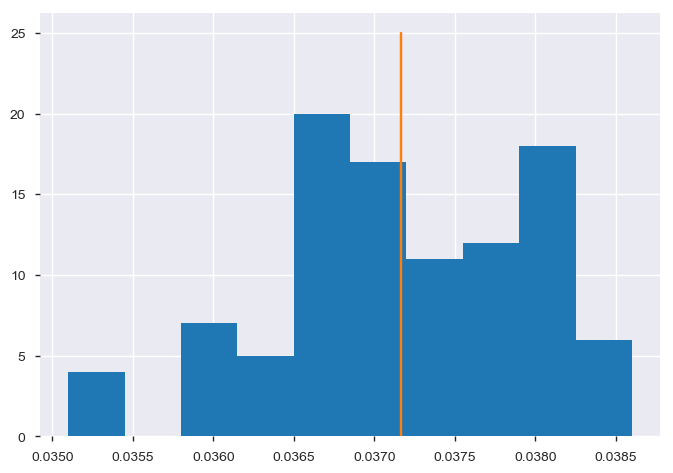

In [192]:
plt.hist(sorted(df_pin['pin_weight']))
mean = sum(df_pin['pin_weight'])/len(df_pin['pin_weight'])

plt.plot([mean, mean], [0, 25])

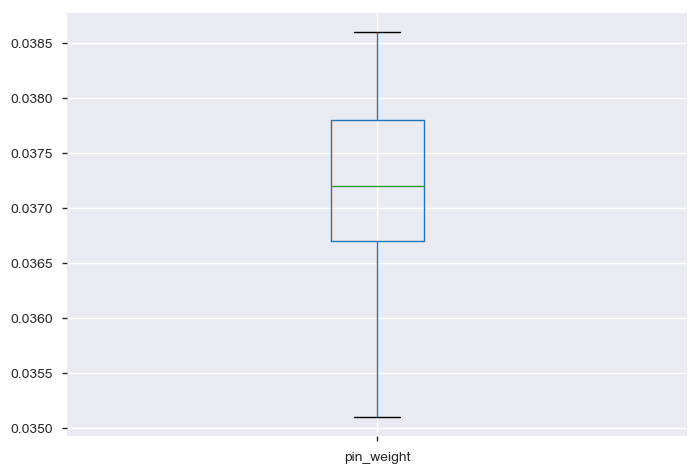

In [193]:
box_plot = df_pin.boxplot(column='pin_weight')
# plt.boxplot(df_pin['pin_weight'])

# variance of weight seems not so large in 100 pin sameple

### Go back to review weight_with_pin data

In [168]:
df_merge_0 = df_merge[ (df_merge['New_column'] =='Micro') & (df_merge['Weight_with_pin'] ==0)]

In [169]:
df_merge_0[(df_merge_0['W_length'] > 0) ].shape

(186, 14)

## 整體各型值沿海拔的分布pattern

In [134]:
df_macro_mt.columns

Index(['Specimen No.', 'Family', 'Species', 'Altitude', 'W_length', 'B_length',
       'Weight', 'Weight_with_pin', 'Weight_pin', 'Coll_data', 'Coll_date',
       'Note_x', 'Note_y', 'New_column'],
      dtype='object')

In [136]:
print (df_macro_mt[df_macro_mt['W_length'] >0.0].shape, df_macro_mt[df_macro_mt['B_length'] >0.0].shape)

(5903, 14) (5903, 14)


In [137]:
print('Species :  {:s}. W_length {:f} mm.'.format('栗六點天蛾', max(df_macro_mt['W_length'])))
print('Species :  {:s}. W_length {:f} mm.'.format('黃波緣苔蛾', min(df_macro_mt['W_length'])))

Species :  栗六點天蛾. W_length 58.260000 mm.
Species :  黃波緣苔蛾. W_length 5.200000 mm.


[Text(0,0,'MCE0250'),
 Text(0,0,'MCE0500'),
 Text(0,0,'MCE0750'),
 Text(0,0,'MCE1000'),
 Text(0,0,'MCE1250'),
 Text(0,0,'MCE1500'),
 Text(0,0,'MCE1750'),
 Text(0,0,'MCE2000'),
 Text(0,0,'MCE2250'),
 Text(0,0,'MCE2500'),
 Text(0,0,'MCE2750'),
 Text(0,0,'MCE3000'),
 Text(0,0,'MCE3250')]

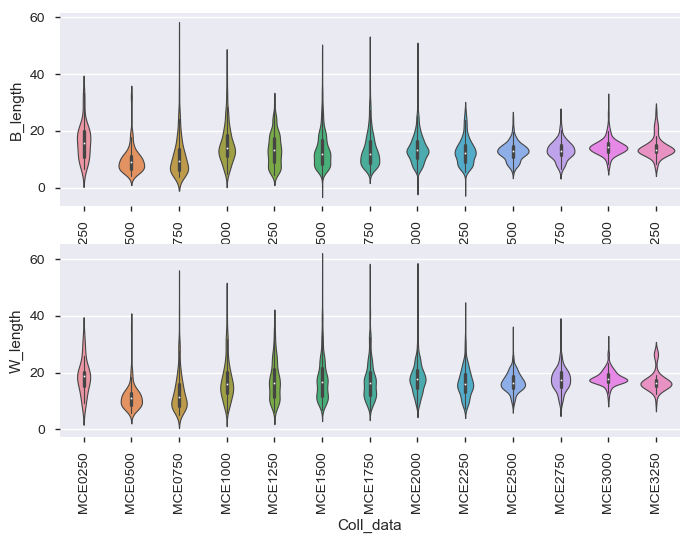

In [138]:
fig, ax =plt.subplots(2,1)
ax1 =sns.violinplot(x ='Coll_data', y = 'B_length', data = df_macro_mt, linewidth = 0.8, ax =ax[0])
ax2 =sns.violinplot(x ='Coll_data', y = 'W_length', data = df_macro_mt, linewidth = 0.8, ax =ax[1])
labels = ax1.get_xticklabels()
ax1.set_xticklabels(labels, rotation = 90)
ax2.set_xticklabels(labels, rotation = 90)

In [139]:
# df_macro_mt.to_csv('E:/df_trait_Taiwan_20180522.csv')

## B_length 與 W_length　的相關性

In [114]:
print ('Pearson_r : {:f} '.format(df_macro_mt['B_length'].corr(df_macro_mt['W_length'], method='pearson')))
print ('Spearman_r : {:f} '.format(df_macro_mt['B_length'].corr(df_macro_mt['W_length'], method='spearman')))

Pearson_r : 0.926002 
Spearman_r : 0.919773 


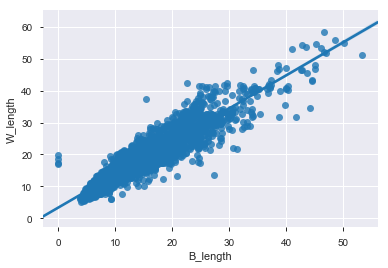

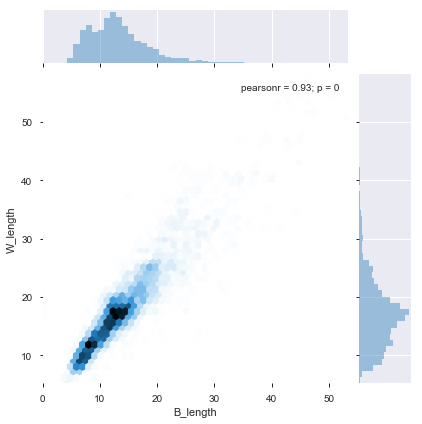

In [221]:
sca = sns.regplot(x = 'B_length', y = 'W_length', data = df_macro_mt)
join = sns.jointplot(x = 'B_length', y = 'W_length', data = df_macro_mt, kind='hex')

## 四川兩型值沿海拔的分布概況

In [91]:
elevation = pd.read_csv('E:\origin_data\species_data\moth\Moth_elevation_Sichuan_201707.csv', encoding='big5')
df = pd.read_csv('E:\origin_data\species_data\moth\Moth_trait_Sichuan_201707.csv')

In [92]:
elevation =elevation.loc[:, ['id', 'elevation']]
elevation.head(5)

,id,elevation
0,1,2000.0
1,2,2000.0
2,3,2000.0
3,4,2000.0
4,5,2000.0


In [93]:
df = df.iloc[:, 0:3]

In [106]:
df_trait_ele = pd.merge(df, elevation, how='left', left_on='No', right_on = 'id')
df_trait_ele = df_trait_ele.iloc[542:, [1, 2, 4]]
df_trait_ele = df_trait_ele[(df_trait_ele['Wing length (mm)'] < 1000) & (df_trait_ele['Body length (mm)'] <1000)]
df_trait_ele.head(5)

,Wing length (mm),Body length (mm),elevation
542,15.50,10.60,2000.0
543,26.16,21.45,2000.0
544,17.92,12.44,2000.0
545,25.06,21.37,2000.0
546,19.49,16.84,2000.0


In [110]:
print( max(df_trait_ele['Wing length (mm)']), min(df_trait_ele['Wing length (mm)']))

50.11 8.01


In [111]:
pandas_profiling.ProfileReport(df_trait_ele)

Number of variables,4
Number of observations,1908
Total Missing (%),0.0%
Total size in memory,59.7 KiB
Average record size in memory,32.0 B
Numeric,4
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [112]:
print ('Pearson_r : {:f} '.format(df_trait_ele['Body length (mm)'].corr(df_trait_ele['Wing length (mm)'], method='pearson')))
print ('Spearman_r : {:f} '.format(df_trait_ele['Body length (mm)'].corr(df_trait_ele['Wing length (mm)'], method='spearman')))

Pearson_r : 0.855882 
Spearman_r : 0.775259 


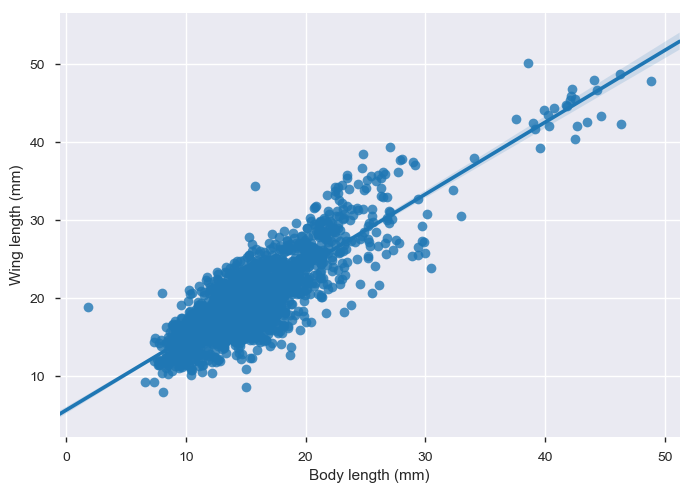

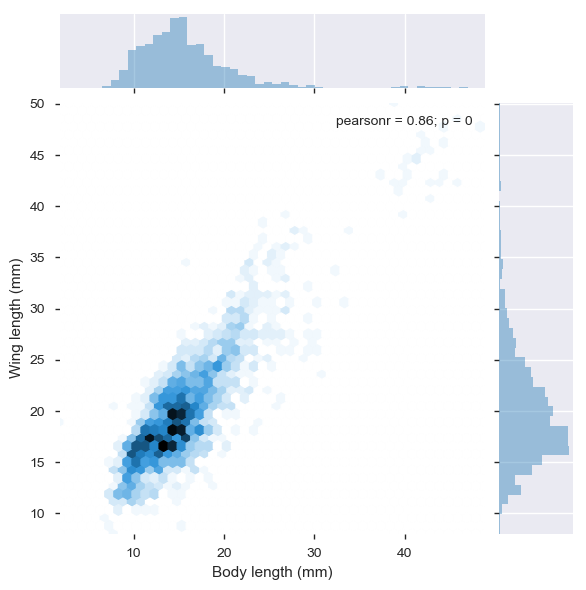

In [113]:
sca = sns.regplot(x = 'Body length (mm)', y = 'Wing length (mm)', data = df_trait_ele)
join = sns.jointplot(x = 'Body length (mm)', y = 'Wing length (mm)', data = df_trait_ele, kind='hex')

[Text(0,0,'880.0'),
 Text(0,0,'1530.0'),
 Text(0,0,'2000.0'),
 Text(0,0,'2600.0'),
 Text(0,0,'3150.0'),
 Text(0,0,'3600.0')]

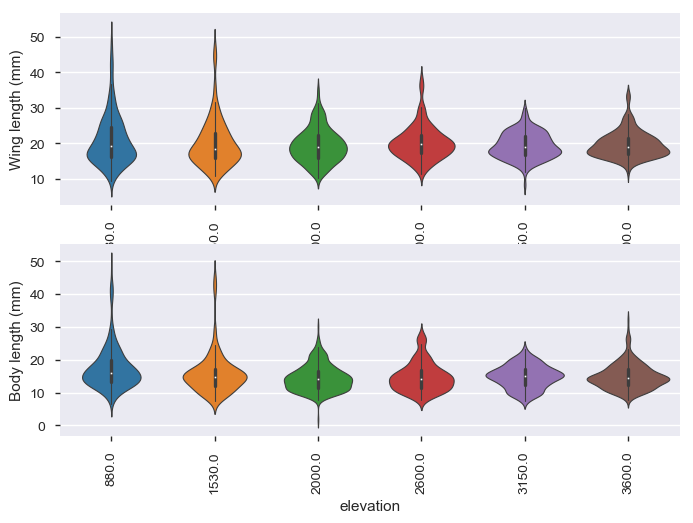

In [114]:
fig, ax =plt.subplots(2,1)
ax1 =sns.violinplot(x =str('elevation'), y = 'Wing length (mm)', data =df_trait_ele, linewidth = 0.8, ax =ax[0])
ax2 =sns.violinplot(x =str('elevation'), y = 'Body length (mm)', data =df_trait_ele, linewidth = 0.8, ax =ax[1])
labels = ax1.get_xticklabels()
ax1.set_xticklabels(labels, rotation = 90)
ax2.set_xticklabels(labels, rotation = 90)

In [115]:
# df_trait_ele.to_csv('E:/df_trait_ele_Sichaun_20180522.csv')